<a href="https://www.kaggle.com/code/abdeldjalilchafai/flight-delays-2015-eda?scriptVersionId=262110105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


# Exploratory Data Analysis on US Flight Delays (2015) 

This notebook is a walkthrough of a structured, data cleaning pipeline using rea-world flight-delay data along with a structured analysis of the visualised data generated through matplotlib and seaborn.

Goal: application and progress towards mastery of a 6-step data cleaning framework in preparation for future research projects.


# 1. Understanding the structure




In [2]:
     #=====================================================  section one  ================================================================#
#load data:
import pandas as pd 

airports_df = pd.read_csv('/kaggle/input/flight-delays/airports.csv', low_memory=False)
airlines_df = pd.read_csv('/kaggle/input/flight-delays/airlines.csv', low_memory=False)
flights_df = pd.read_csv('/kaggle/input/flight-delays/flights.csv', low_memory=False)

#Explore data:

#info as a quick overview:
print("\nAirports Dataset info:\n" + "=" * 45 + "\n")
airports_df.info()

print("\nAirlines Dataset info:\n" + "=" * 45 + "\n")
airlines_df.info()

print("\nFlights Dataset info:\n" + "=" * 45 + "\n")
flights_df.info() 
print()

print("_" * 80)

###.describe() for basic statistics
print("\nQuick statistics for:\n")
print("\nAirports:\n" + "=" * 45 + "\n",
      airports_df.describe()) #view basic stats

print("\nAirlines:\n" + "=" * 45 + "\n",
      airlines_df.describe()) #view basic stats 

print("\nFlights:\n" + "=" * 45 + "\n", 
      flights_df.describe()) #view basic stats 
print("\n" + "_" * 80 + "\n")


##optional but useful: print top and bottom

#airports
print("=" * 45 + "Airports DF beginning and end: " + "=" * 45)


print("\n" + "Beginning:\n", airports_df.head(), "\nEnd:\n",  airports_df.tail(), "\n") #first and last five lines



#airlines
print("=" * 45 + "Airlines DF beginning and end: " + "=" * 45)

print("\n" + "Beginning:\n", airlines_df.head(), "\nEnd:\n",  airlines_df.tail(), "\n") #first and last five lines


#flights
print("=" * 45 + "Flights DF beginning and end: " + "=" * 45)

print("\n" + "Beginning:\n", flights_df.head(), "\nEnd:\n", flights_df.tail(), "\n") #first and last five lines

###note to self: error at the bottom means nothing too important - just that there are NaN values where integers or floats were expected


Airports Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB

Airlines Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes

Flights Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 col

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

# 2. Handling Missing Values:

In [3]:
#=====================================================  section two  ================================================================#

# Helper function to display count of missing values per column, sorted in descending order
def is_null(df, name):
    print("\n" + "=" * 45, name.upper(), "=" * 45 + "\n")
    print(df.isnull().sum().sort_values(ascending=False))

# Function to calculate and drop columns with more than 10% missing values
def df_percent_null(df, name):
    """
    Checks percentage of values missing if there are any within a column.
    Drops the columns with >10% missing values.
    """
    print("\n" + "=" * 45, name.upper() + "'s PERCENTAGE OF MISSING VALUES" + "=" * 45 + "\n")
    total_rows = len(df)
    
    for col in df.columns:
        missing = df[col].isnull().sum()
        if missing > 0:  # Only calculate percentage if missing values are present
            percent = (missing / total_rows) * 100
            print(f"{col}: {missing} missing ({percent:.2f}%)")
            if percent > 10:  # Drop column if above threshold
                print(f"Dropped: {col} — exceeds 10% threshold\n")
                df.drop(columns=[col], inplace=True)

    return df

# Display initial missing values
print("=" * 45 + " BEFORE PROCESSING " + "=" * 45)
is_null(airports_df, "Airports")
is_null(airlines_df, "Airlines")
is_null(flights_df, "Flights")

# Clean data and reassign updated DataFrames
airports_df = df_percent_null(airports_df, "Airports")
airlines_df = df_percent_null(airlines_df, "Airlines")
flights_df = df_percent_null(flights_df, "Flights")

print("flights_df.shape =", flights_df.shape)

# Display final result
print("\n" + "=" * 45 + " AFTER PROCESSING " + "=" * 45)
is_null(airports_df, "Airports")
is_null(airlines_df, "Airlines")
is_null(flights_df, "Flights")


============================================= BEFORE PROCESSING =============================================

============================================= AIRPORTS =============================================

LATITUDE     3
LONGITUDE    3
IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
dtype: int64

============================================= AIRLINES =============================================

IATA_CODE    0
AIRLINE      0
dtype: int64

============================================= FLIGHTS =============================================

CANCELLATION_REASON    5729195
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
AIRLINE_DELAY          4755640
SECURITY_DELAY         4755640
AIR_SYSTEM_DELAY       4755640
AIR_TIME                105071
ARRIVAL_DELAY           105071
ELAPSED_TIME            105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
TAXI_OUT                 89047
WHEELS_OFF        

# 3. Clean and Normalise Columns:

In [4]:
# Standardise column names: lowercase, no spaces, no extra punctuation
def col_std(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

col_std(airports_df)
col_std(airlines_df)
col_std(flights_df)
# Clean string fields: Capitalise Values
def clean_str_col(df, name):
    print("=" * 45 + f"Cleaned string columns in: {name.upper()}" + "=" * 45)
    for col in df.columns: #iterate through each column and if of type string standardise it.
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.upper()
            uv = df[col].value_counts()
            print(f"\nColumn: {col}\n{uv}")

clean_str_col(airports_df, "Airports")
clean_str_col(airlines_df, "Airlines")
clean_str_col(flights_df, "Flights")

=============================================Cleaned string columns in: AIRPORTS=============================================

Column: iata_code
iata_code
ABE    1
PIB    1
MVY    1
MTJ    1
MSY    1
      ..
EWR    1
EWN    1
EVV    1
EUG    1
YUM    1
Name: count, Length: 322, dtype: int64

Column: airport
airport
LEHIGH VALLEY INTERNATIONAL AIRPORT                           1
HATTIESBURG-LAUREL REGIONAL AIRPORT                           1
MARTHA'S VINEYARD AIRPORT                                     1
MONTROSE REGIONAL AIRPORT                                     1
LOUIS ARMSTRONG NEW ORLEANS INTERNATIONAL AIRPORT             1
                                                             ..
NEWARK LIBERTY INTERNATIONAL AIRPORT                          1
COASTAL CAROLINA REGIONAL AIRPORT (CRAVEN COUNTY REGIONAL)    1
EVANSVILLE REGIONAL AIRPORT                                   1
EUGENE AIRPORT (MAHLON SWEET FIELD)                           1
YUMA INTERNATIONAL AIRPORT                

# 4/5. Explicitly convert data types and drop duplicates

In [5]:
import pandas as pd
import numpy as np


# Convert columns containing 'date' to datetime format
def convert_date(df, name):
    print(f"Converting date columns in: {name}")
    found = False
    for col in df.columns:
        if 'date' in col.lower():
            found = True
            print(f"  Found date column: {col}")
            print("  Preview before conversion:", df[col].head(3).tolist())
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print("  Preview after conversion:", df[col].head(3).tolist())
            print(f"  Resulting dtype: {df[col].dtype}\n")
    if not found:
        print(f"  No date columns found in {name}.\n")

convert_date(airports_df, "Airports")
convert_date(airlines_df, "Airlines")
convert_date(flights_df, "Flights")

# Construct a datetime column manually in flights_df using year, month, day
flights_df['fl_dates'] = pd.to_datetime(flights_df[['year', 'month', 'day']])
print("Constructed 'fl_dates' column from year, month, day:")
print(flights_df['fl_dates'].head(3))

# Convert all columns to numeric (where applicable)
def convert_numeric(df, name):
    print(f"\nConverting numeric columns in: {name}")
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
            print(f"  Converted to numeric: {col}")
        except:
            continue

convert_numeric(airports_df, "Airports")
convert_numeric(airlines_df, "Airlines")
convert_numeric(flights_df, "Flights")

# Drop duplicate rows
def drop_duplicates_clean(df, name):
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    dropped = before - after
    print(f"\nDropped {dropped} duplicate rows from {name}.\n")
    return df

airports_df = drop_duplicates_clean(airports_df, "Airports")
airlines_df = drop_duplicates_clean(airlines_df, "Airlines")
flights_df = drop_duplicates_clean(flights_df, "Flights")


Converting date columns in: Airports
  No date columns found in Airports.

Converting date columns in: Airlines
  No date columns found in Airlines.

Converting date columns in: Flights
  No date columns found in Flights.

Constructed 'fl_dates' column from year, month, day:
0   2015-01-01
1   2015-01-01
2   2015-01-01
Name: fl_dates, dtype: datetime64[ns]

Converting numeric columns in: Airports
  Converted to numeric: latitude
  Converted to numeric: longitude

Converting numeric columns in: Airlines

Converting numeric columns in: Flights
  Converted to numeric: year
  Converted to numeric: month
  Converted to numeric: day
  Converted to numeric: day_of_week
  Converted to numeric: flight_number
  Converted to numeric: scheduled_departure
  Converted to numeric: departure_time
  Converted to numeric: departure_delay
  Converted to numeric: taxi_out
  Converted to numeric: wheels_off
  Converted to numeric: scheduled_time
  Converted to numeric: elapsed_time
  Converted to numeric: 

# 6. Remove Outliers


In [6]:
#high and low outliers using the IQR method
def remove_outliers_iqr(df, name): 
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns #only include columns of numeric data types
    mask = pd.Series([True] * len(df))  # keep all values at first
    
    print(f"/n[Outlier Removal] = {name}")
    """
    removes any rows containing outliers using iqr method
    prints the number of rows dropped per column
    """
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        col_mask = df[col].between(lower, upper, inclusive='both') & df[col].notna()
        dropped = (~col_mask).sum()
        print(f"- {col}: {dropped} rows would be dropped")
        mask &= col_mask 

    return df[mask] #bool mask.

remove_outliers_iqr(airports_df, "Airports")
remove_outliers_iqr(airlines_df, "Airlines")
remove_outliers_iqr(flights_df, "Flights")


/n[Outlier Removal] = Airports
- latitude: 24 rows would be dropped
- longitude: 16 rows would be dropped
/n[Outlier Removal] = Airlines


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


/n[Outlier Removal] = Flights
- year: 0 rows would be dropped
- month: 0 rows would be dropped
- day: 0 rows would be dropped
- day_of_week: 0 rows would be dropped
- flight_number: 27073 rows would be dropped
- scheduled_departure: 0 rows would be dropped
- departure_time: 86153 rows would be dropped
- departure_delay: 822395 rows would be dropped
- taxi_out: 371649 rows would be dropped
- wheels_off: 89047 rows would be dropped
- scheduled_time: 299017 rows would be dropped
- elapsed_time: 396155 rows would be dropped
- air_time: 401413 rows would be dropped
- distance: 349511 rows would be dropped
- wheels_on: 92513 rows would be dropped
- taxi_in: 375051 rows would be dropped
- scheduled_arrival: 0 rows would be dropped
- arrival_time: 92513 rows would be dropped
- arrival_delay: 617073 rows would be dropped
- diverted: 15187 rows would be dropped
- cancelled: 89884 rows would be dropped
- fl_dates: 0 rows would be dropped


,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,fl_dates
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,1420070400000000000
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,1420070400000000000
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,1420070400000000000
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,1420070400000000000
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,1420070400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,190.0,1826,534.0,15.0,546,549.0,3.0,0,0,1451520000000000000
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,1451520000000000000
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,1451520000000000000
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,1451520000000000000


Note: could this be improved to ensure no valid rows get removed?

# Visualisations and Analysis:


will include: 

- Flights over time - look for trends in busiest dates.
- Top 10 airlines - which airline flies the most?
- Flight Duration Histogram - detect anomalies & common duration.
- Busiest Origin Airports - city-based insights.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

#for a cleaner look 
sns.set(style = "whitegrid")

# Flights Over Time


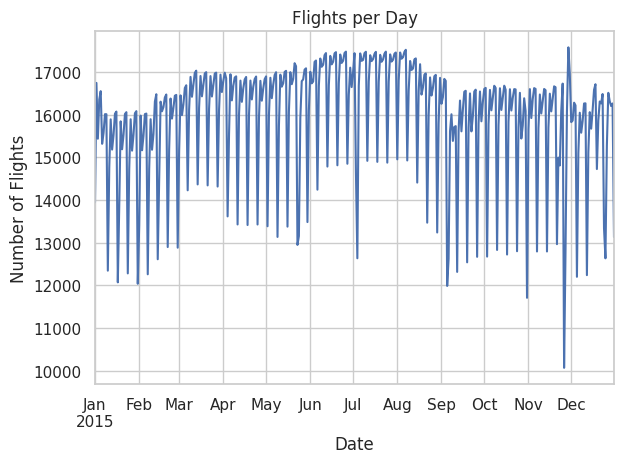

In [8]:
flights_df['fl_dates'] = pd.to_datetime(flights_df['fl_dates'], errors = 'coerce')
flights_df = flights_df.sort_values('fl_dates')


flights_by_date = flights_df['fl_dates'].value_counts().sort_index()
flights_by_date.plot()
plt.title("Flights per Day")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

# Analysis:
- Consistent weekly rythm is maintained mostly throughout the year, this is most likely due to stable cycles of demand.
- Flight volume is highest throughout the summer months, due to higher number of people travelling during the summer months as this is     when school breaks start therefore families are more likely to travel.
- Consistent and sharp dips presented consistently throughout the year, this could be due to extreme weather or pricing.
- The strongest fluctuation occurs between late november to early december which could reflect the thanksgiving holiday as this is         representing data solely in the US.

# To Investigate Further:
1. Why are there consistent sharp dips throughout the year?
       Note: could investigate weather reports and price listings throughout 2015 and see if any of these were the cause? Additionally                further research on travel trends could prove to be beneficial in determining the cause.

2. Holiday timings for kids in the US could indicate the reason for the high peak in travel during the summer months as well as the large November/December fluctuation.

# Top Ten Airlines:


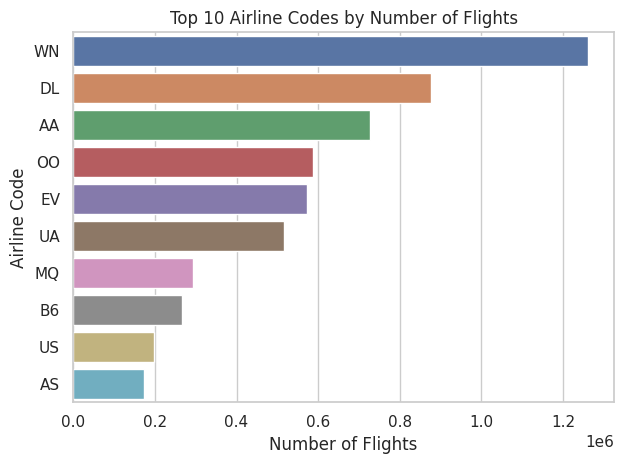

In [9]:
airline_counts = flights_df['airline'].value_counts().head(10)

sns.barplot(x = airline_counts.values, y=airline_counts.index)
plt.title("Top 10 Airline Codes by Number of Flights")
plt.xlabel("Number of Flights")
plt.ylabel("Airline Code")
plt.tight_layout()
plt.show()

# Analysis:
- There is a significant gap in flight volume between Southwest Airlines(WN) and the other airlines. Therefore, from the data assesed      we can conclude it is the leader in terms of operational frequency.
- Delta(DL), American Airlines(AA), and SkyWest(OO) come in a cluster of 2nd, 3rd and 4th. Athough well behind WN, they are still          operating at high volumes relative to the average.


# To Investigate Further:
1. Some airlines may charge a lot more for their flights and/or bring in more profit due to more passangers booking premium seating as
   well as bigger planes and fully booked flights.
       Note: analyse flight prices, number of seats booked for flight, frequency of different planes used and their capacity in addition
             to premium seating booking and pricing. Analysis on this data would allow more precise conclusions to be derived on airline              success.
2. What strategies is Southwest using in order to stay so far ahead of the rest of the Airlines? 

# Top Ten Origin Airports (by flight count):

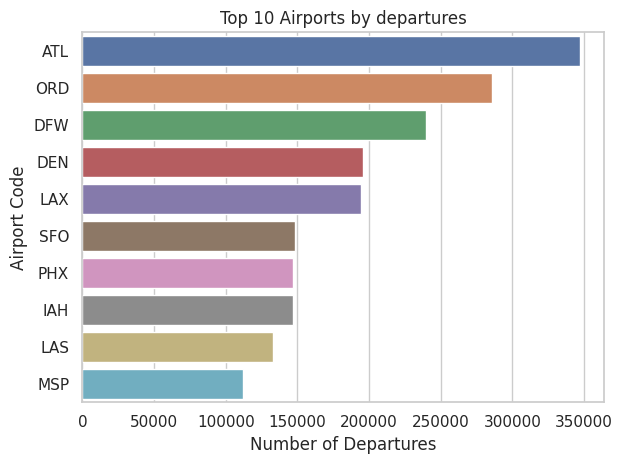

In [10]:
top_airports = flights_df['origin_airport'].value_counts().head(10)

sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title("Top 10 Airports by departures")
plt.xlabel("Number of Departures")
plt.ylabel("Airport Code")
plt.tight_layout()
plt.show()

# Analysis:
- ATL (Hartsfield–Jackson Atlanta) is shown to be the busiest origin Airport in the US, which aligns with the results found by the         federal Aviation administration based on passenger boarding and All-Cargo Data for U.S Airports:

  
         Federal Aviation Administration (FAA), 2024. Passenger Boarding (Enplanement) and All-Cargo Data for U.S. Airports. [online]             Available at: https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger [Accessed 13 Apr. 2025].


- ORD (Chicago O'Hare) and DFW (Dallas/Fort Worth) are second and third while following closely.
- The list includes a mix of different geographical locations from within the US, showing that with the data currently processed there     is no correlation between geogrpahical location and Airport performance.
    Note: perhaps data of population could be assessed against the airports activity to show relative 'busyness' as high cities with a             high population also have a higher chance of being busier.

- Analyzing destinations from these airports could reveal deeper airline network strategies.


# To Investigate Further:
1. Is there a correlation between population and airport 'business'?


# Distribution of Flight Duration: 


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


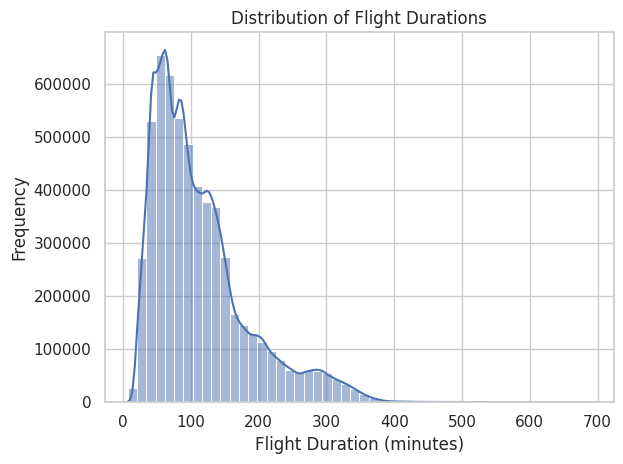

In [11]:
import numpy as np


sns.histplot(flights_df['air_time'], bins=50, kde=True)
plt.title("Distribution of Flight Durations")
plt.xlabel("Flight Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Analysis:
- The majority of flights are under 3–5 hours, showing short and mid-range routes are the most dominant with a minority in long-haul flights.
- The right-skew indicates a long-tail of longer-haul flights, possibly international or cross-country:
      - while most flights fall within the moderate time range (50-100 minutes), a small subset of longer hall flights causes a right            skew in the distribution. This is expected as international/continental flights are much longer however less frequent aligning           with findings in prior research, which attributes the long tail to the presence of long-haul flights.
  
          Baluch, M., Bergstra, T. and El-Hajj, M., 2017. Complex analysis of United States flight data using a data mining approach.              In: 2017 IEEE 7th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 9–11 Jan. 2017. IEEE,           pp. 1–6. doi: 10.1109/CCWC.2017.7868414.

  
- A small number of extremely long durations may be due to any further nesessary data cleaning and need to be investigated as the column
used for the data ("air_time") should not include delay times.

Note: At first glance, the flight durations seem to be quite short, as the data column used is air_time, there may have been some datapoints removed unintentionally due to the IQR calculations.

# To Investigate Further:
1. What is causing extremely long durations?
2. Was there any data excluded that was not justifiably dropped?
